In [204]:
# supressing warnings
import warnings
warnings.filterwarnings('ignore')
# numpy and pandas
import numpy as np
import pandas as pd

# Reading Data

In [205]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [206]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [207]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


### consolidating data in to one single table

In [208]:
# merging data on customerid
df_1 = pd.merge(churn_data, customer_data, how="inner", on="customerID")
df_1.head(1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No


In [209]:
telecom = pd.merge(df_1, internet_data, how="inner", on="customerID")
telecom.head(1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No


### Inspecting the Data

In [210]:
telecom.shape

(7043, 21)

In [211]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [212]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [213]:
telecom.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

# Step 3 - Data Preparation

### Converting some Binary Yes/No - 1/0

In [214]:
#List of variables to map
varlist = ["PaperlessBilling","Churn","Partner","Dependents","PhoneService"]

In [215]:
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})

telecom[varlist] = telecom[varlist].apply(binary_map)

In [216]:
telecom.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


### For categorical variables with multiple levels, create dummy features (One Hot Encoded)

In [217]:
# Create dummy variables for some of the categoricald variables and dropping the first variable from the first one|
var_cat_col = ["gender","InternetService","Contract","PaymentMethod"]
dummy_1 =  pd.get_dummies(telecom[var_cat_col], drop_first=True, dtype=int)

In [218]:
dummy_1.head(5)

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0


In [219]:
telecom = pd.concat([telecom, dummy_1], axis=1)

In [220]:
telecom.head(1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,0,0,0,1,0


In [221]:
telecom.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### No phone service and No Internet Service is dropped because Phone Service and Internet Service has already been considered in the other variables separately

In [222]:
# Create Dummy variable for the remaining categorical  variable and dropping the first variable
m1 = pd.get_dummies(telecom["MultipleLines"], prefix="MultipleLines", dtype=int)
m1 = m1.drop(["MultipleLines_No phone service"], axis=1)
telecom = pd.concat([telecom, m1], axis=1)

os = pd.get_dummies(telecom["OnlineSecurity"], prefix="OnlineSecurity", dtype=int)
os = os.drop(["OnlineSecurity_No internet service"], axis=1)
telecom = pd.concat([telecom, os], axis=1)

ob = pd.get_dummies(telecom["OnlineBackup"], prefix="OnlineBackup", dtype=int)
ob = ob.drop(["OnlineBackup_No internet service"], axis=1)
telecom = pd.concat([telecom, ob], axis=1)

dp = pd.get_dummies(telecom["DeviceProtection"], prefix="DeviceProtection", dtype=int)
dp = dp.drop(["DeviceProtection_No internet service"], axis=1)
telecom = pd.concat([telecom, dp], axis=1)

ts = pd.get_dummies(telecom["TechSupport"], prefix="TechSupport", dtype=int)
ts = ts.drop(["TechSupport_No internet service"], axis=1)
telecom = pd.concat([telecom, ts], axis=1)

stv = pd.get_dummies(telecom["StreamingTV"], prefix="StreamingTV", dtype=int)
stv = stv.drop(["StreamingTV_No internet service"], axis=1)
telecom = pd.concat([telecom, stv], axis=1)

sm = pd.get_dummies(telecom["StreamingMovies"], prefix="StreamingMovies", dtype=int)
sm = sm.drop(["StreamingMovies_No internet service"], axis=1)
telecom = pd.concat([telecom, sm], axis=1)

In [223]:
telecom.OnlineBackup.astype('category').value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [224]:
telecom.OnlineSecurity.astype('category').value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [225]:
telecom.DeviceProtection.astype('category').value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [226]:
telecom.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [227]:
telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0


In [228]:
# Dropping the repeated variables
telecom = telecom.drop(["gender","InternetService","Contract","PaymentMethod","MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], axis=1)

In [229]:
#variable was imported in to string and hence converted to Numeric
telecom["TotalCharges"] = pd.to_numeric(telecom["TotalCharges"], errors="coerce")
#telecom.TotalCharges  =  pd.to_numeric(telecom.TotalCharges, downcast="float")
#telecom.TotalCharges = telecom.TotalCharges.astype(dtype= float)
#telecom.TotalCharges = telecom.TotalCharges.convert_dtypes(convert_floating=True)
# to_numeric, astype, infer_objects, 
#telecom["TotalCharges"] = telecom.TotalCharges.astype(int)

In [230]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  gender_Male                            7043 non-null   int64  
 11  Inte

In [231]:
num_telecom = telecom[["MonthlyCharges","TotalCharges","SeniorCitizen", "TotalCharges"]]

In [232]:
# checking the outliers at 25%, 50%, 75%, 90%, 95%, 99%
#num_telecom.describe(percentiles=[.25,.5,.75,.9,.95,.99])

In [233]:
# checking missing values
telecom.isnull().mean()

customerID                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.001562
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000


In [234]:
telecom = telecom[~pd.isna(telecom.TotalCharges)]

In [235]:
telecom.shape

(7032, 32)

In [236]:
telecom.isnull().mean()

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

# Step 4 - Train Test Split

In [237]:
#pip install -U scikit-learn scipy matplotlib

In [238]:

from sklearn.model_selection import train_test_split
X = telecom.drop(["Churn","customerID"], axis=1)

In [239]:
y= telecom["Churn"]

In [240]:
X.shape

(7032, 30)

In [241]:
y.shape

(7032,)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, train_size=0.7)

In [243]:
X_train.shape

(4922, 30)

In [244]:
X_test.shape

(2110, 30)

In [245]:
y_train.shape

(4922,)

In [246]:
y_test.shape

(2110,)

# Step 5 - Feature Scaling

In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
scaler = StandardScaler()

In [249]:
X_train.head(2)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,gender_Male,InternetService_Fiber optic,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,33,1,1,54.65,1665.20,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
5790,40,0,1,50.85,2036.55,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1


In [250]:
selected_features = ["tenure", "TotalCharges", "MonthlyCharges"]
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])

In [251]:
X_train.describe(percentiles=[0.25,0.5,0.75,.95,.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,gender_Male,InternetService_Fiber optic,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,4.922000e+03,4922.000000,4922.000000,4.922000e+03,4.922000e+03,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.00000,4922.000000,4922.000000,4922.00000
mean,7.506750e-17,0.903901,0.591223,-2.064356e-16,1.183757e-16,0.161926,0.480699,0.297237,0.503657,0.439862,...,0.431735,0.351280,0.440471,0.342544,0.485575,0.297440,0.40065,0.382365,0.395165,0.38785
std,1.000102e+00,0.294757,0.491658,1.000102e+00,1.000102e+00,0.368420,0.499678,0.457088,0.500037,0.496421,...,0.495368,0.477419,0.496494,0.474609,0.499843,0.457178,0.49008,0.486014,0.488936,0.48731
min,-1.286319e+00,0.000000,0.000000,-1.548555e+00,-1.002408e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,-9.598159e-01,1.000000,0.000000,-9.665930e-01,-8.344722e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,-1.435582e-01,1.000000,1.000000,1.823658e-01,-3.877341e-01,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,9.583897e-01,1.000000,1.000000,8.341630e-01,6.589888e-01,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
95%,1.611396e+00,1.000000,1.000000,1.414296e+00,2.036970e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
99%,1.611396e+00,1.000000,1.000000,1.658537e+00,2.545449e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
max,1.611396e+00,1.000000,1.000000,1.793569e+00,2.818847e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000


In [252]:
(sum(telecom.Churn)/len(telecom.Churn.index))*100

26.578498293515356

# Step 6 - Looking at Correlation

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

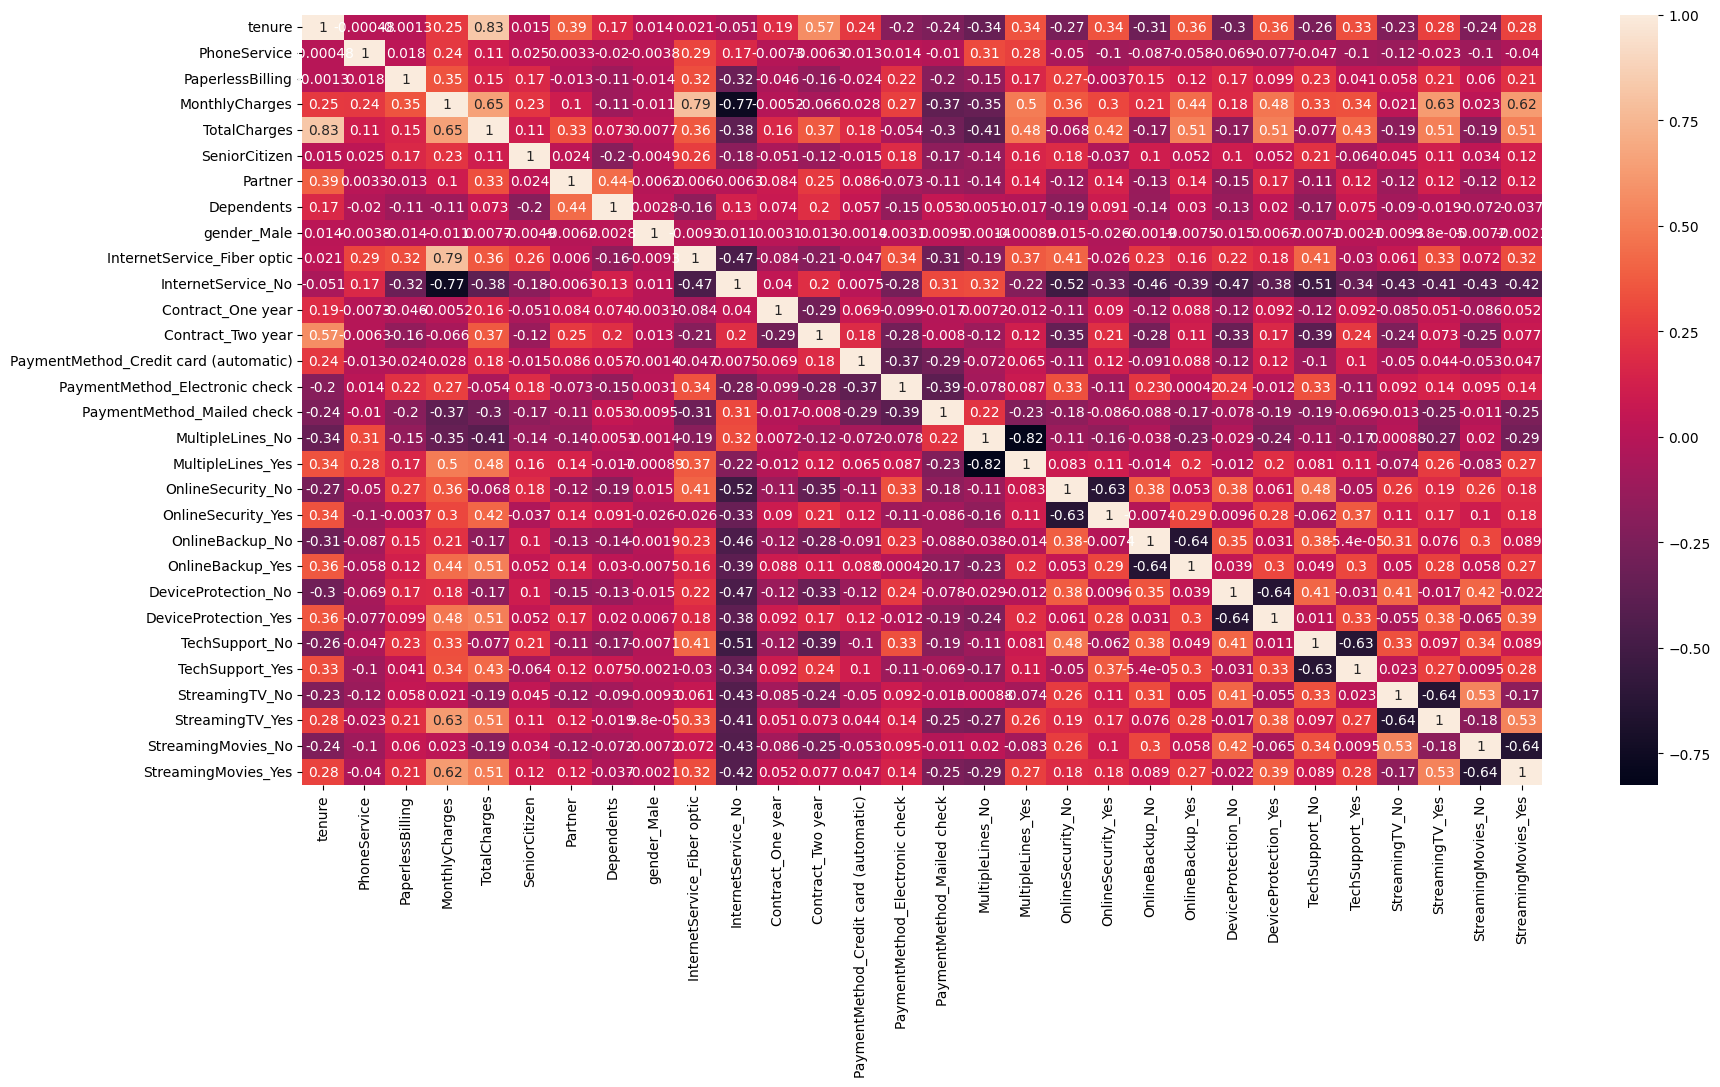

In [254]:
# let see the correlation
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [255]:
X_train = X_train.drop(["MultipleLines_No", "OnlineBackup_No", "DeviceProtection_No", "OnlineSecurity_No", "DeviceProtection_No", "StreamingTV_No", "StreamingMovies_No"], axis=1)

In [256]:
X_test = X_test.drop(["MultipleLines_No", "OnlineBackup_No", "DeviceProtection_No", "OnlineSecurity_No", "DeviceProtection_No", "StreamingTV_No", "StreamingMovies_No"], axis=1)

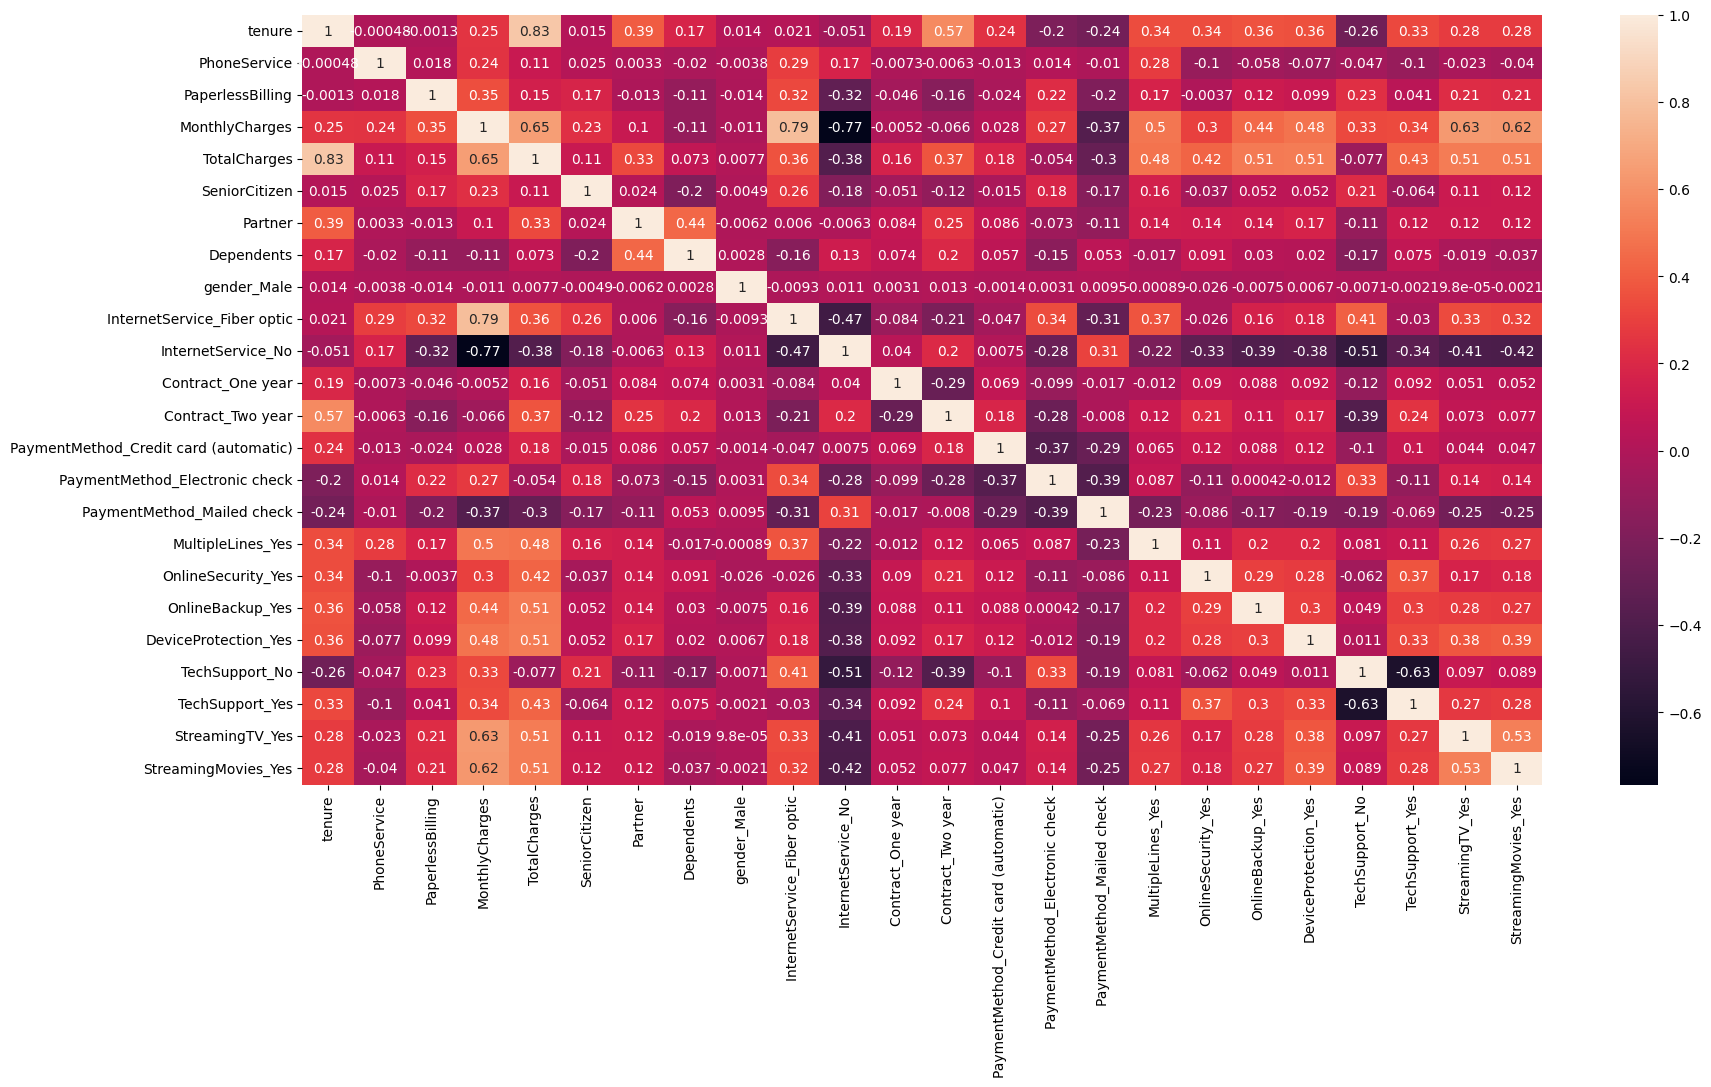

In [257]:
# After dropping variable let's see the correlation 

plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Step 7 - Model Building

### running your First Training Model

In [258]:
#! pip install  statsmodels
import statsmodels.api as sm
# Logistic Regression model
logml = sm.GLM(y_train, (sm.add_constant(X_train)))
family = sm.families.Binomial()
logml.fit().summary()
# Some features are really having high P Stats and can be dropped using RFE

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Gaussian   Df Model:                           23
Link Function:               Identity   Scale:                         0.13753
Method:                          IRLS   Log-Likelihood:                -2089.5
Date:                Sun, 30 Jun 2024   Deviance:                       673.60
Time:                        22:10:28   Pearson chi2:                     674.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3357
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1079      0.182     -0.592      0.554      -0.465       0.249
tenure                                   -0.0439      0.015     -3.004      0.003      -0.072      -0.015
PhoneService                              0.1105      0.106      1.039      0.299      -0.098       0.319
PaperlessBilling                          0.0412      0.012      3.483      0.000       0.018       0.064
MonthlyCharges                           -0.1765      0.157     -1.127      0.260      -0.483       0.130
TotalCharges                             -0.1132      0.017     -6.491      0.000      -0.147      -0.079
SeniorCitizen                             0.0758      0.015      4.909      0.000       0.046       0.106
Partner                                   0.0046      0.013      0.357      0.721      -0.020       0.030
Dependents                               -0.0183      0.013     -1.361      0.174      -0.045       0.008
gender_Male                              -0.0055      0.011     -0.521      0.603      -0.026       0.015
InternetService_Fiber optic               0.3227      0.130      2.474      0.013       0.067       0.578
InternetService_No                       -0.2392      0.157     -1.527      0.127      -0.546       0.068
Contract_One year                        -0.1026      0.016     -6.267      0.000      -0.135      -0.071
Contract_Two year                        -0.0555      0.020     -2.742      0.006      -0.095      -0.016
PaymentMethod_Credit card (automatic)    -0.0242      0.016     -1.512      0.131      -0.056       0.007
PaymentMethod_Electronic check            0.0485      0.016      3.078      0.002       0.018       0.079
PaymentMethod_Mailed check               -0.0281      0.017     -1.640      0.101      -0.062       0.005
MultipleLines_Yes                         0.0749      0.029      2.583      0.010       0.018       0.132
OnlineSecurity_Yes                       -0.0136      0.030     -0.460      0.645      -0.072       0.044
OnlineBackup_Yes                          0.0084      0.029      0.288      0.774      -0.049       0.065
DeviceProtection_Yes                      0.0312      0.030      1.055      0.292      -0.027       0.089
TechSupport_No                            0.0770      0.028      2.768      0.006       0.022       0.132
TechSupport_Yes                           0.0543      0.012      4.430      0.000       0.030       0.078
StreamingTV_Yes                           0.1196      0.054      2.227      0.026       0.014       0.225
StreamingMovies_Yes                       0.1014      0.054      1.890      0.059      -0.004       0.207
=========================================================================================================
"""

# Step 8 - RFE Recursive Feature Elimination 

In [259]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [260]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [261]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True,  True,  True])

In [262]:
rfe.ranking_

array([ 1,  3,  1,  1,  1,  1,  9,  7,  8,  1,  1,  1,  1,  1,  4,  1,  1,
        2,  6, 10,  5,  1,  1,  1])

In [263]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', np.True_, np.int64(1)),
 ('PhoneService', np.False_, np.int64(3)),
 ('PaperlessBilling', np.True_, np.int64(1)),
 ('MonthlyCharges', np.True_, np.int64(1)),
 ('TotalCharges', np.True_, np.int64(1)),
 ('SeniorCitizen', np.True_, np.int64(1)),
 ('Partner', np.False_, np.int64(9)),
 ('Dependents', np.False_, np.int64(7)),
 ('gender_Male', np.False_, np.int64(8)),
 ('InternetService_Fiber optic', np.True_, np.int64(1)),
 ('InternetService_No', np.True_, np.int64(1)),
 ('Contract_One year', np.True_, np.int64(1)),
 ('Contract_Two year', np.True_, np.int64(1)),
 ('PaymentMethod_Credit card (automatic)', np.True_, np.int64(1)),
 ('PaymentMethod_Electronic check', np.False_, np.int64(4)),
 ('PaymentMethod_Mailed check', np.True_, np.int64(1)),
 ('MultipleLines_Yes', np.True_, np.int64(1)),
 ('OnlineSecurity_Yes', np.False_, np.int64(2)),
 ('OnlineBackup_Yes', np.False_, np.int64(6)),
 ('DeviceProtection_Yes', np.False_, np.int64(10)),
 ('TechSupport_No', np.False_, np.int64(5)),
 (

In [264]:
col = X_train.columns[rfe.support_]

In [265]:
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [266]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents', 'gender_Male',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_No'],
      dtype='object')

### Assessing the Models with StatsModel

In [267]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sun, 30 Jun 2024   Deviance:                       4022.2
Time:                        22:10:28   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [268]:
# getting the trained value on the predicted set
y_trained_pred = res.predict(X_train_sm)
y_trained_pred

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
          ...   
79      0.015336
3934    0.126458
5964    0.039247
6947    0.129142
5649    0.031459
Length: 4922, dtype: float64

In [270]:
y_trained_pred = y_trained_pred.values.reshape(-1)

In [271]:
y_trained_pred

array([0.19264205, 0.27562384, 0.59950707, ..., 0.03924737, 0.12914179,
       0.03145932])

In [274]:
y_trained_pred_final = pd.DataFrame({"Churn": y_train.values, "Churn_Prob": y_trained_pred})
y_trained_pred_final["CustID"] = y_train.index

In [275]:
y_trained_pred_final

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784
...,...,...,...
4917,0,0.015336,79
4918,0,0.126458,3934
4919,0,0.039247,5964
4920,0,0.129142,6947


### Creating new column 'predicted'  with 1  if Churn_Prob > 0.5 else 0

In [276]:
y_trained_pred_final["predicted"] = y_trained_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [277]:
y_trained_pred_final

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1
...,...,...,...,...
4917,0,0.015336,79,0
4918,0,0.126458,3934,0
4919,0,0.039247,5964,0
4920,0,0.129142,6947,0


### Confusion Metrics

In [279]:
from sklearn import metrics

In [281]:
# Confusion Metrics
confusion = metrics.confusion_matrix(y_trained_pred_final.Churn, y_trained_pred_final.predicted)
confusion

array([[3275,  360],
       [ 574,  713]])

In [282]:
metrics.accuracy_score(y_trained_pred_final.Churn, y_trained_pred_final.predicted)

0.8102397399431126